In [ ]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD


In [ ]:
# loading the dataset
from tensorflow.keras import datasets
(train_img, train_lab), (test_img, test_lab) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


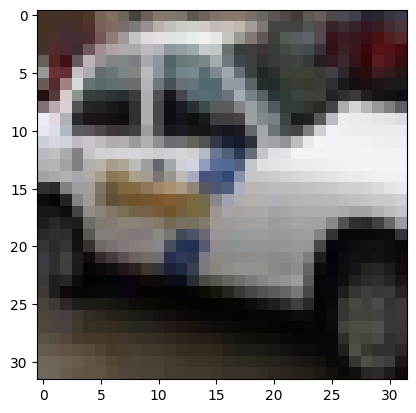

In [ ]:
#plotting an image from data
import matplotlib.pyplot as plt
plt.imshow(train_img[2005])

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
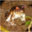

In [ ]:
train_img[0]

In [ ]:
train_img.shape

(50000, 32, 32, 3)

In [ ]:
# normalizing the images
train_img = train_img/255.0
test_img = test_img/255.0

In [ ]:
train_img[7]

array([[[0.10980392, 0.1372549 , 0.15294118],
        [0.11764706, 0.13333333, 0.17254902],
        [0.12941176, 0.17254902, 0.18431373],
        ...,
        [0.16862745, 0.21960784, 0.17647059],
        [0.20392157, 0.25098039, 0.20784314],
        [0.18039216, 0.22745098, 0.18431373]],

       [[0.10588235, 0.11764706, 0.14901961],
        [0.10588235, 0.10980392, 0.16078431],
        [0.08235294, 0.12156863, 0.15294118],
        ...,
        [0.43921569, 0.53333333, 0.38039216],
        [0.45882353, 0.54901961, 0.39607843],
        [0.45098039, 0.54117647, 0.39215686]],

       [[0.13333333, 0.14117647, 0.16470588],
        [0.12941176, 0.12941176, 0.16862745],
        [0.09411765, 0.11764706, 0.15686275],
        ...,
        [0.68627451, 0.81568627, 0.56078431],
        [0.69411765, 0.81960784, 0.56470588],
        [0.69019608, 0.81568627, 0.56078431]],

       ...,

       [[0.55686275, 0.69019608, 0.4627451 ],
        [0.55686275, 0.69019608, 0.4627451 ],
        [0.58823529, 0

In [ ]:
train_img = train_img.astype('float32')
test_img = test_img.astype('float32')

Model building

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [ ]:
keras.backend.clear_session()
model6 = Sequential()
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model6.add(BatchNormalization())
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))
model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.3))
model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.4))
model6.add(Flatten())
model6.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))
model6.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,rotation_range=20)
it_train = datagen.flow(train_img, to_categorical(train_lab))
steps = int(train_img.shape[0] / 64)
history6=model6.fit_generator(it_train,epochs=80,steps_per_epoch=steps,validation_data=(test_img, to_categorical(test_lab)))

<ipython-input-11-afbdcaa90091>:32: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history6=model6.fit_generator(it_train,epochs=80,steps_per_epoch=steps,validation_data=(test_img, to_categorical(test_lab)))


Epoch 1/80
781/781 [==============================] - 43s 29ms/step - loss: 1.9631 - accuracy: 0.3361 - val_loss: 1.3923 - val_accuracy: 0.4963
Epoch 2/80
781/781 [==============================] - 21s 27ms/step - loss: 1.4666 - accuracy: 0.4694 - val_loss: 1.2459 - val_accuracy: 0.5483
Epoch 3/80
781/781 [==============================] - 21s 26ms/step - loss: 1.3187 - accuracy: 0.5270 - val_loss: 1.3855 - val_accuracy: 0.5272
Epoch 4/80
781/781 [==============================] - 21s 27ms/step - loss: 1.1978 - accuracy: 0.5721 - val_loss: 1.3004 - val_accuracy: 0.5828
Epoch 5/80
781/781 [==============================] - 21s 26ms/step - loss: 1.1190 - accuracy: 0.6089 - val_loss: 1.1146 - val_accuracy: 0.6125
Epoch 6/80
781/781 [==============================] - 19s 25ms/step - loss: 1.0597 - accuracy: 0.6295 - val_loss: 1.0118 - val_accuracy: 0.6551
Epoch 7/80
781/781 [==============================] - 21s 26ms/step - loss: 1.0132 - accuracy: 0.6477 - val_loss: 0.8998 - val_accuracy:

Intermediate layer model, before data is fed into the xgboost

In [ ]:
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [ ]:
model6.layers[18]

In [ ]:
flatten_model = tf.keras.Model(inputs = model6.inputs, outputs = model6.layers[18].output)

In [ ]:
flatten_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0     

Values obtained from the flatten layer( Dataset for other models )

In [ ]:
features_train = flatten_model.predict(train_img)

1563/1563 [==============================] - 3s 2ms/step


In [ ]:
features_train[0]

array([-0.5345629 , -0.6036698 ,  1.0652056 , ..., -0.20596674,
       -0.4728356 , -0.75781465], dtype=float32)

In [ ]:
features_train[shape]

NameError: name 'shape' is not defined

In [ ]:
features_test = flatten_model.predict(test_img)

313/313 [==============================] - 1s 3ms/step


In [ ]:
features_train.shape

(50000, 2048)

In [ ]:
features_test.shape

(10000, 2048)

In [ ]:
type(features_train)

numpy.ndarray

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.DataFrame(features_train)

In [ ]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,-0.684263,-0.706851,0.682849,0.068414,-0.461987,-0.510734,-0.064524,-0.707391,0.011639,-0.490601,...,-0.85852,-0.771150,0.661550,0.638916,-0.981759,-0.413278,-0.187591,-0.667974,0.550370,2.156868
1,-0.684263,-0.706851,-0.698777,-0.949980,4.430528,1.221830,0.069785,-0.950473,-0.629810,-0.490601,...,-0.85852,-0.771150,-0.771627,12.357662,-0.981759,0.625245,-0.914341,-0.667974,-0.534845,-0.791722
2,-0.684263,-0.363818,-0.698777,-0.949980,0.442858,-0.510734,-0.829178,-0.950473,-0.629810,-0.490601,...,-0.85852,-0.136581,1.886167,-0.686965,-0.981759,-0.871450,-0.428460,-0.667974,-0.534845,-0.791722
3,-0.684263,-0.706851,-0.698777,2.337670,-0.686239,-0.510734,-0.791893,-0.490045,-0.629810,-0.490601,...,-0.85852,-0.771150,0.974180,-0.686965,-0.981759,-0.871450,1.987253,-0.667974,-0.534845,-0.748093
4,-0.684263,-0.706851,-0.698777,1.143971,0.310926,-0.510734,-0.342076,-0.950473,-0.629810,-0.490601,...,-0.85852,1.266940,1.124244,7.560091,-0.981759,0.899928,-0.914341,-0.667974,-0.534845,-0.791722


In [ ]:
dataset['train_label'] = train_lab

In [ ]:
lab_train = dataset['train_label']

In [ ]:
train_lab

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,train_label
0,-0.684263,-0.706851,0.682849,0.068414,-0.461987,-0.510734,-0.064524,-0.707391,0.011639,-0.490601,...,-0.771150,0.661550,0.638916,-0.981759,-0.413278,-0.187591,-0.667974,0.550370,2.156868,6
1,-0.684263,-0.706851,-0.698777,-0.949980,4.430528,1.221830,0.069785,-0.950473,-0.629810,-0.490601,...,-0.771150,-0.771627,12.357662,-0.981759,0.625245,-0.914341,-0.667974,-0.534845,-0.791722,9
2,-0.684263,-0.363818,-0.698777,-0.949980,0.442858,-0.510734,-0.829178,-0.950473,-0.629810,-0.490601,...,-0.136581,1.886167,-0.686965,-0.981759,-0.871450,-0.428460,-0.667974,-0.534845,-0.791722,9
3,-0.684263,-0.706851,-0.698777,2.337670,-0.686239,-0.510734,-0.791893,-0.490045,-0.629810,-0.490601,...,-0.771150,0.974180,-0.686965,-0.981759,-0.871450,1.987253,-0.667974,-0.534845,-0.748093,4
4,-0.684263,-0.706851,-0.698777,1.143971,0.310926,-0.510734,-0.342076,-0.950473,-0.629810,-0.490601,...,1.266940,1.124244,7.560091,-0.981759,0.899928,-0.914341,-0.667974,-0.534845,-0.791722,1


In [ ]:
dataset.shape

(50000, 2049)

Below - 'f' stands for feature

In [ ]:
train_f_labels = dataset['train_label']

In [ ]:
train_f_labels = train_f_labels.values

Train dataset which will get fed into models

In [ ]:
train_f = dataset.drop(labels = ['train_label'], axis = 1)

In [ ]:
train_f = train_f.values

In [ ]:
train_f

array([[-0.68426263, -0.7068512 ,  0.6828489 , ..., -0.6679738 ,
         0.5503702 ,  2.1568685 ],
       [-0.68426263, -0.7068512 , -0.69877666, ..., -0.6679738 ,
        -0.5348451 , -0.79172206],
       [-0.68426263, -0.36381823, -0.69877666, ..., -0.6679738 ,
        -0.5348451 , -0.79172206],
       ...,
       [-0.68426263,  1.5366741 , -0.69877666, ...,  0.6565158 ,
        -0.5348451 , -0.79172206],
       [-0.68426263,  0.9428658 , -0.69877666, ..., -0.6679738 ,
         2.9562042 ,  0.4426829 ],
       [-0.68426263, -0.7068512 , -0.69877666, ...,  4.4974275 ,
        -0.2847044 , -0.79172206]], dtype=float32)

In [ ]:
import xgboost as xgb

In [ ]:
xg = xgb.XGBClassifier(objective = 'multi:softmax', num_class=10, n_estimators = 100, max_depth = 4, learning_rate = 0.1)

# Now, Train features and labels : train_f, train_f_labels
##    Test features and labels : test_f, test_f_labels

In [ ]:
xg.fit(train_f, train_f_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=10,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
train_f_labels

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

Test dataset

In [ ]:
test_f = pd.DataFrame(features_test)

In [ ]:
test_f.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,-0.419521,-0.706851,1.857408,-0.949980,1.910852,1.039224,-0.829178,0.076660,-0.629810,0.503043,...,-0.85852,1.094330,-0.771627,-0.686965,-0.443598,-0.731515,-0.914341,0.522302,-0.534845,1.567848
1,-0.684263,2.880928,-0.698777,-0.204218,1.812628,-0.510734,-0.829178,-0.950473,-0.629810,-0.490601,...,-0.85852,8.752217,5.251047,-0.686965,-0.981759,-0.871450,-0.914341,-0.667974,-0.534845,-0.791722
2,-0.607797,1.929573,-0.698777,0.867342,1.080791,-0.283759,-0.829178,-0.950473,-0.629810,-0.490601,...,-0.85852,-0.402539,0.635942,4.067854,-0.688163,-0.871450,-0.914341,-0.667974,-0.386116,1.173936
3,-0.494716,0.348679,-0.514203,1.013379,1.515830,-0.510734,-0.829178,0.273282,-0.629810,-0.490601,...,-0.85852,0.927870,-0.320838,-0.686965,1.308509,-0.871450,-0.914341,0.922712,-0.534845,0.233945
4,-0.684263,0.595475,-0.698777,0.084498,2.959814,-0.510734,-0.829178,-0.950473,-0.629810,-0.490601,...,-0.85852,-0.771150,0.829837,-0.254614,-0.981759,-0.871450,2.534453,-0.667974,-0.534845,3.130798
5,-0.684263,-0.706851,-0.698777,1.511019,-0.210173,-0.510734,0.467025,-0.258887,1.199516,-0.157384,...,-0.85852,0.983767,2.165945,1.594887,-0.981759,-0.871450,-0.914341,-0.667974,-0.534845,-0.791722
6,-0.684263,-0.706851,-0.698777,-0.312307,-0.771167,-0.510734,1.055458,-0.569919,-0.629810,-0.490601,...,-0.85852,-0.458171,-0.771627,6.847553,-0.422549,0.932286,-0.914341,-0.667974,-0.135992,-0.791722
7,-0.684263,0.506747,3.384523,-0.832172,0.010346,0.925514,-0.829178,0.181350,-0.629810,-0.490601,...,-0.85852,0.894464,3.494938,-0.686965,-0.981759,-0.871450,-0.017789,-0.039492,-0.534845,1.515929
8,1.529879,-0.706851,1.716731,-0.622971,-0.668859,-0.227116,-0.829178,-0.950473,-0.629810,-0.490601,...,-0.85852,-0.771150,-0.030263,-0.686965,-0.981759,-0.871450,1.668778,-0.667974,-0.534845,0.616387
9,-0.684263,-0.706851,-0.698777,-0.556059,1.354789,-0.132860,-0.829178,-0.950473,-0.629810,-0.490601,...,-0.85852,0.405067,-0.771627,2.012566,-0.981759,0.581057,-0.914341,-0.667974,2.621031,0.713698


In [ ]:
test_f_labels = test_lab

In [ ]:
xg_predictions = xg.predict(test_f)

In [ ]:
xg_predictions.shape

(10000,)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(test_f_labels, xg_predictions)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.86


In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lightgbm as lgb

In [ ]:
lgb_clf = lgb.LGBMClassifier()

In [ ]:
lgb_clf.fit(train_f, train_f_labels)

LGBMClassifier()

In [ ]:
lgb_pred = lgb_clf.predict(test_f)

In [ ]:
accuracy_lgb = accuracy_score(test_f_labels, lgb_pred)
print('Accuracy: {:.2f}'.format(accuracy_lgb))

Accuracy: 0.87


## Now, using CatBoost

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.0 MB/s eta 0:00:00


In [ ]:
import catboost as cb

In [ ]:
cb_clf = cb.CatBoostClassifier(iterations = 100)

In [ ]:
cb_clf.fit(train_f, train_f_labels)

Learning rate set to 0.5
0:	learn: 1.5740483	total: 24.6s	remaining: 40m 33s
1:	learn: 1.3185279	total: 37.4s	remaining: 30m 31s
2:	learn: 1.1601424	total: 49.7s	remaining: 26m 46s
3:	learn: 1.0209379	total: 1m 2s	remaining: 24m 50s
4:	learn: 0.9284055	total: 1m 14s	remaining: 23m 36s
5:	learn: 0.8547204	total: 1m 26s	remaining: 22m 41s
6:	learn: 0.7945572	total: 1m 39s	remaining: 21m 59s
7:	learn: 0.7490452	total: 1m 51s	remaining: 21m 22s
8:	learn: 0.7216398	total: 2m 5s	remaining: 21m 8s
9:	learn: 0.6867275	total: 2m 17s	remaining: 20m 41s
10:	learn: 0.6608640	total: 2m 30s	remaining: 20m 16s
11:	learn: 0.6401072	total: 2m 42s	remaining: 19m 53s
12:	learn: 0.6183706	total: 2m 56s	remaining: 19m 38s
13:	learn: 0.5981249	total: 3m 8s	remaining: 19m 17s
14:	learn: 0.5808643	total: 3m 20s	remaining: 18m 56s
15:	learn: 0.5652689	total: 3m 32s	remaining: 18m 37s
16:	learn: 0.5539592	total: 3m 45s	remaining: 18m 19s
17:	learn: 0.5446307	total: 3m 57s	remaining: 18m 2s
18:	learn: 0.5321705	

In [ ]:
clf_pred = cb_clf.predict(test_f)

In [ ]:
accuracy_clf = accuracy_score(test_f_labels, clf_pred)
print('Accuracy: {:.2f}'.format(accuracy_clf))

Accuracy: 0.84
